In [156]:
import os
import pandas as pd
import numpy as np
import collections
from sklearn.base import TransformerMixin
import random
import pandas_profiling


In [157]:
os.chdir("C:/Users/venkatasai.talatam/Downloads")
df = pd.read_csv('bank.csv', sep=';')
replaced = collections.defaultdict(set)
ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
random.shuffle(ix)
to_replace = int(round(.1*len(ix)))
for row, col in ix:
    if len(replaced[row]) < df.shape[1] - 1:
        df.iloc[row, col] = np.nan
        to_replace -= 1
        replaced[row].add(col)
        if to_replace == 0:
            break

In [158]:
# dimension of the data
print(df.shape)

(4521, 17)


In [159]:
# explore what each attribute the type is
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4054 non-null float64
job          4041 non-null object
marital      4069 non-null object
education    4045 non-null object
default      4099 non-null object
balance      4049 non-null float64
housing      4066 non-null object
loan         4082 non-null object
contact      4102 non-null object
day          4075 non-null float64
month        4101 non-null object
duration     4060 non-null float64
campaign     4059 non-null float64
pdays        4076 non-null float64
previous     4048 non-null float64
poutcome     4073 non-null object
y            4072 non-null object
dtypes: float64(7), object(10)
memory usage: 600.5+ KB


In [160]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4054.000000,4049.000000,4075.000000,4060.000000,4059.000000,4076.000000,4048.000000
mean,41.126542,1386.394665,15.916564,261.660099,2.803153,40.153582,0.543478
std,10.498811,2904.107038,8.251770,260.714713,3.069337,100.972770,1.690710
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,184.000000,2.000000,-1.000000,0.000000
75%,49.000000,1471.000000,21.000000,325.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,44.000000,871.000000,25.000000


In [161]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [162]:
df.isna().sum()

age          467
job          480
marital      452
education    476
default      422
balance      472
housing      455
loan         439
contact      419
day          446
month        420
duration     461
campaign     462
pdays        445
previous     473
poutcome     448
y            449
dtype: int64

In [163]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [164]:
df = DataFrameImputer().fit_transform(df)
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

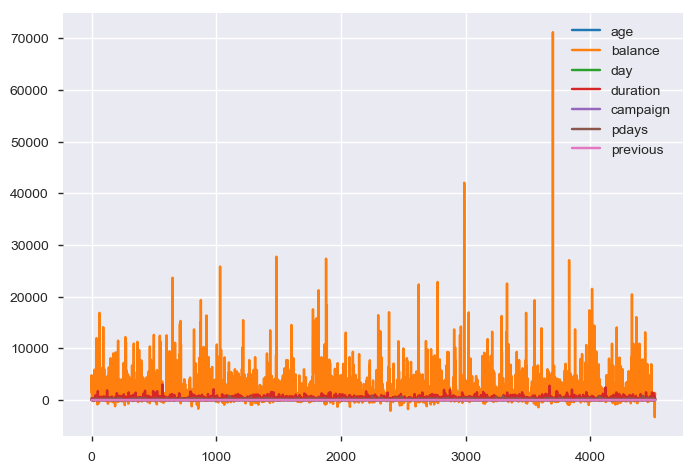

In [165]:
df.plot()

In [166]:
num = df._get_numeric_data() 
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1
print(num < (Q1 - 1.5 * IQR))
print(num > (Q3 + 1.5 * IQR))


        age  balance    day  duration  campaign  pdays  previous
0     False    False  False     False     False  False     False
1     False    False  False     False     False  False     False
2     False    False  False     False     False  False     False
3     False    False  False     False     False  False     False
4     False    False  False     False     False  False     False
5     False    False  False     False     False  False     False
6     False    False  False     False     False  False     False
7     False    False  False     False     False  False     False
8     False    False  False     False     False  False     False
9     False    False  False     False     False  False     False
10    False    False  False     False     False  False     False
11    False    False  False     False     False  False     False
12    False    False  False     False     False  False     False
13    False    False  False     False     False  False     False
14    False    False  Fal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A7B8D9E8>,
      dtype=object)

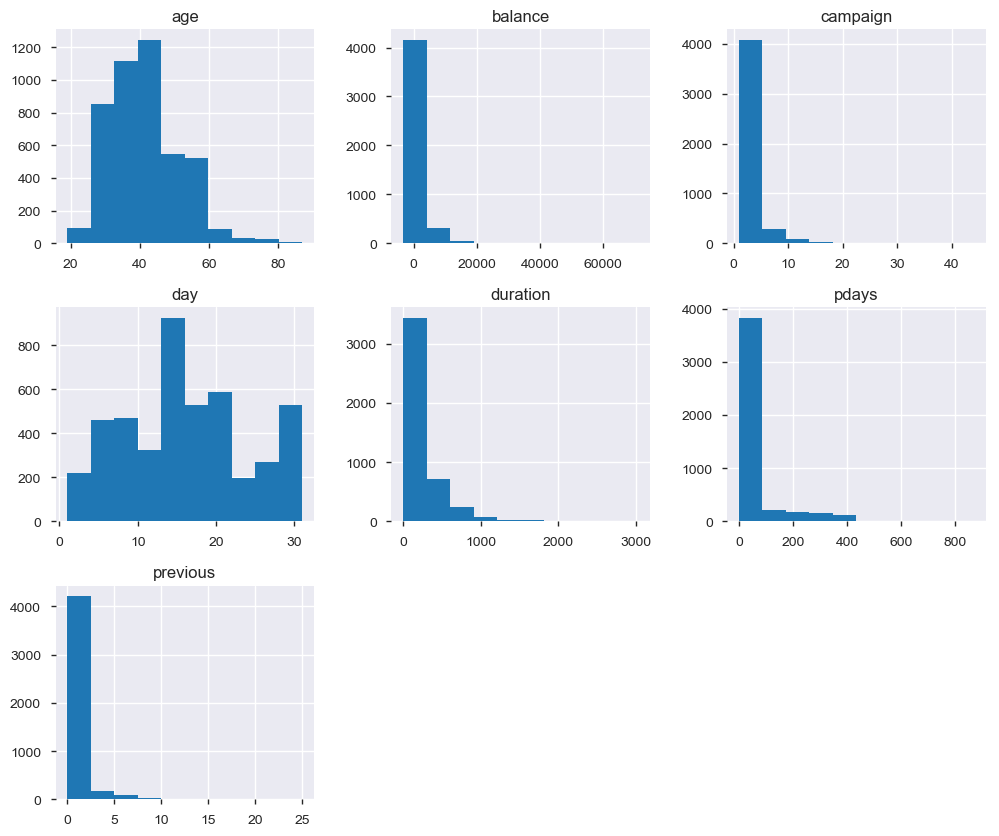

In [167]:
df.hist(figsize=(12,10)) # display numerical feature distribution

In [168]:
pandas_profiling.ProfileReport(df)

Number of variables,17
Number of observations,4521
Total Missing (%),0.0%
Total size in memory,600.5 KiB
Average record size in memory,136.0 B
Numeric,7
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [173]:
# lets segment the data to numeric and categorical and carry out distribution transformation on the numeric data
# for getting numerical data from the raw data
numeric_df = df._get_numeric_data()
# for getting categorical variable from a data frame
cat_df = df.select_dtypes(include=['object'])


In [174]:
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,30.0,1787.0,19.0,79.0,1.0,-1.000000,0.0
1,33.0,4789.0,11.0,220.0,1.0,339.000000,4.0
2,35.0,1350.0,16.0,185.0,1.0,40.153582,1.0
3,30.0,1476.0,3.0,199.0,4.0,-1.000000,0.0
4,59.0,0.0,5.0,226.0,1.0,-1.000000,0.0


In [175]:
cat_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,secondary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,no,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [176]:
# loop for identifying the columns with non-normal distribution 
numeric_df_array = np.array(numeric_df) # converting to numpy arrays for more efficient computation

loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

p = 1.67009e-82
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 1.23315e-94
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


In [177]:
# create a PowerTransformer based transformation (box-cox) (note: box-cox can handle only positive values)
#pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # applicable if box-cox is used
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True) # applicable if yeo-johnson is used

In [178]:
# select columns to  normalize
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)
col_for_normalization

[0, 1, 2, 3, 4, 5, 6]

In [179]:
# transforming to normal distribution
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)

In [180]:
# select columns to not normalize
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)

# binding both the non-normalized and normalized columns
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)

numeric_df_normalized.head()

,age,balance,day,duration,campaign,pdays,previous
0,-1.221148,0.292175,0.438603,-0.964288,-1.191839,-0.594071,-0.595915
1,-0.805679,1.314893,-0.574038,0.133260,-1.191839,1.783053,1.949715
2,-0.551677,0.125710,0.073462,-0.066989,-1.191839,1.587615,1.695350
3,-1.221148,0.174485,-1.791127,0.016561,1.032723,-0.594071,-0.595915
4,1.617403,-0.499532,-1.453128,0.164918,-1.191839,-0.594071,-0.595915


In [192]:
Target = cat_df["y"]
cat_df = cat_df.drop(columns = ["y"])

In [181]:
# transform all categorical data to dummy variables (we can do hot-encoding also)
for col_name in cat_df.columns:
    if(cat_df[col_name].dtype == 'object'):
        cat_df2 = pd.get_dummies(cat_df)

cat_df2.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [182]:
# merge categorical and numeric
numeric_df_normalized.reset_index(drop=True, inplace=True)
cat_df2.reset_index(drop=True, inplace=True)
df = pd.concat([numeric_df_normalized, cat_df2], axis=1)
print(df.shape)
df.head()

(4521, 53)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,-1.221148,0.292175,0.438603,-0.964288,-1.191839,-0.594071,-0.595915,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,-0.805679,1.314893,-0.574038,0.133260,-1.191839,1.783053,1.949715,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.551677,0.125710,0.073462,-0.066989,-1.191839,1.587615,1.695350,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,-1.221148,0.174485,-1.791127,0.016561,1.032723,-0.594071,-0.595915,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1.617403,-0.499532,-1.453128,0.164918,-1.191839,-0.594071,-0.595915,0,1,0,...,1,0,0,0,0,0,0,1,1,0


In [184]:

# generate train and test
split = np.random.rand(len(df)) < 0.8
train = df[split]
test = df[~split]
print(train.head())
print(test.head())

        age   balance       day  duration  campaign     pdays  previous  \
0 -1.221148  0.292175  0.438603 -0.964288 -1.191839 -0.594071 -0.595915   
1 -0.805679  1.314893 -0.574038  0.133260 -1.191839  1.783053  1.949715   
2 -0.551677  0.125710  0.073462 -0.066989 -1.191839  1.587615  1.695350   
4  1.617403 -0.499532 -1.453128  0.164918 -1.191839 -0.594071 -0.595915   
6 -0.430748 -0.320132 -0.178911  0.668282 -1.191839  1.781450  1.891714   

   job_admin.  job_blue-collar  job_entrepreneur  ...    month_may  month_nov  \
0           0                0                 0  ...            0          0   
1           0                0                 0  ...            1          0   
2           0                0                 0  ...            0          0   
4           0                1                 0  ...            1          0   
6           0                0                 0  ...            1          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  pou

In [186]:
correlations = train[train.columns].corr(method='pearson')
correlations

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.055961,-0.034566,-0.002355,0.003755,-0.004213,0.011671,-0.055491,-0.016502,0.006440,...,-0.095691,0.046783,0.077781,-0.034316,-0.012073,-0.018180,0.026775,0.007706,-0.019672,0.019672
balance,0.055961,1.000000,-0.018376,0.008993,-0.020161,0.041557,0.035048,-0.004299,-0.051540,-0.000134,...,-0.087640,0.123540,0.060612,0.024820,0.027307,0.004502,0.038930,-0.041090,-0.014317,0.014317
day,-0.034566,-0.018376,1.000000,-0.053053,0.129123,-0.042449,-0.070903,0.014041,-0.022207,0.000020,...,-0.009715,0.096829,0.033792,-0.036120,-0.066796,0.004710,-0.030600,0.065039,0.021831,-0.021831
duration,-0.002355,0.008993,-0.053053,1.000000,-0.096490,0.010074,0.011691,-0.047652,0.029217,0.015884,...,-0.001572,0.005397,0.039347,-0.003501,-0.017796,-0.008861,0.072178,-0.011673,-0.323714,0.323714
campaign,0.003755,-0.020161,0.129123,-0.096490,1.000000,-0.118346,-0.111960,-0.027799,0.007571,-0.007075,...,-0.059804,-0.088352,-0.093420,-0.037964,-0.100265,-0.021697,-0.073281,0.123891,0.066140,-0.066140
pdays,-0.004213,0.041557,-0.042449,0.010074,-0.118346,1.000000,0.682107,0.035235,-0.018737,-0.005057,...,0.010008,0.050624,0.066732,0.077438,0.582968,0.330738,0.273973,-0.759776,-0.130193,0.130193
previous,0.011671,0.035048,-0.070903,0.011691,-0.111960,0.682107,1.000000,0.034235,-0.026495,-0.001382,...,0.014610,0.066365,0.058664,0.075325,0.600263,0.353024,0.289417,-0.791774,-0.137951,0.137951
job_admin.,-0.055491,-0.004299,0.014041,-0.047652,-0.027799,0.035235,0.034235,1.000000,-0.153651,-0.061279,...,0.034172,0.004790,0.038339,0.012911,0.026660,0.034477,0.015549,-0.045876,-0.000619,0.000619
job_blue-collar,-0.016502,-0.051540,-0.022207,0.029217,0.007571,-0.018737,-0.026495,-0.153651,1.000000,-0.089601,...,0.137092,-0.056242,-0.051362,-0.042141,-0.004705,-0.006462,-0.038682,0.023565,0.048097,-0.048097
job_entrepreneur,0.006440,-0.000134,0.000020,0.015884,-0.007075,-0.005057,-0.001382,-0.061279,-0.089601,1.000000,...,-0.005325,0.067873,-0.013091,-0.019622,-0.006237,0.012750,-0.030248,0.011454,0.013306,-0.013306
